# **Simple Linear Regression**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

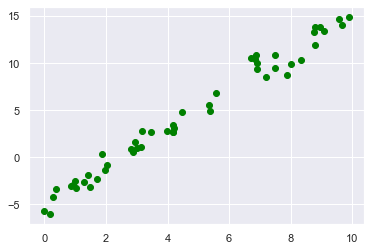

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x,y, color='green')
plt.show()

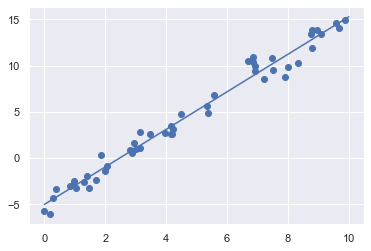

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [4]:
print("model slope:     ", model.coef_[0])
print("Model intercept: ", model.intercept_)

model slope:      2.027208810360695
Model intercept:  -4.998577085553202


In [5]:
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X,y)
print(model.intercept_)
print(model.coef_)

0.49999999999999956
[ 1.5 -2.   1. ]


In [6]:
y

array([  1.21257044,   5.98466738,   8.88625348,   2.78914572,
         8.15201773,  13.43883387,  -4.4952237 , -12.90320137,
        13.4847836 ,   1.94657222,  -0.58258499,   4.72811497,
         9.36437792,   5.68006806,  -8.6373361 ,  -1.71172786,
         0.42187929,   9.98464762,  -2.11327545,  12.57168491,
         7.10283703,   0.94455417,   0.39051363, -10.73713611,
        -9.75602197,   8.84658673,  10.48088938,   3.24607409,
         2.18981544,   1.29825431,   5.30284821,   1.19912956,
        -0.03319118,  12.73311979,  -7.37180789,  -1.67256645,
        -2.18835921,  15.14870215,   0.10091746,  10.34674762,
        11.66721206,  15.11080319,  -5.98961731,   4.17628834,
         0.61740769,   2.40754625, -15.26334946,  11.30088914,
        -0.58508858,   2.8852032 ,   6.50988216,  -3.5668215 ,
         2.03011012,  -2.87515546,   3.53671222,   8.00997838,
         2.25033334,   8.05476933,  -1.90261681,   8.82574444,
         3.14556137,  -5.23908258,  19.72858666,   5.55

## Basis function Regression

### How to use linear regression to nonlinear relationship?

WE can use linear regression to nonlinear relationships between variables is to transform the data according to basis functions.

$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$

to

$y = a_0 + a_1x + a_2x^2 + a_3x^3 + .. $

we let $x_n = f_x(x)$ where $f_n()$ is some function that transforms our data.

It is still is linear model, the linearity refers to the fact that the coefficient $a_n$ never multiply or divide each other. What we have effectively done is taken one dimensional $x$ value and projected them into a higher dimension.



In [7]:
# Polynomial basis function
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

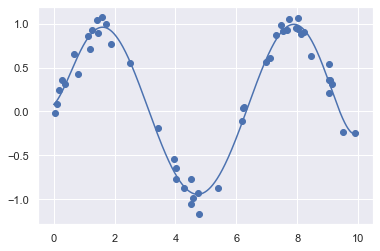

In [9]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## Gaussian Basis Function

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x -y) / width
        return np.exp(-0.5 * np.sum(arg**2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:,:,np.newaxis], self.centers_, self.width_, axis=1)
        

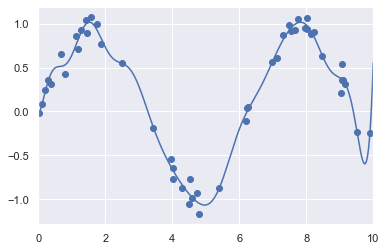

In [11]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlim(0,10)
plt.show()

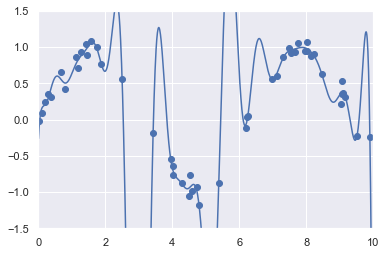

In [14]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.show()

In [18]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:,np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))

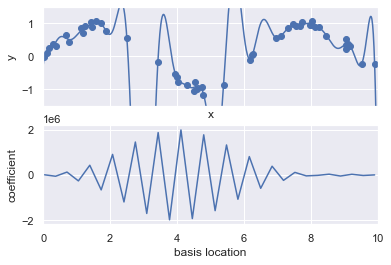

In [19]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

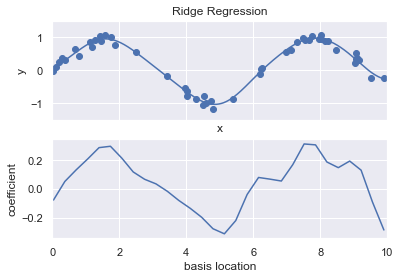

In [20]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

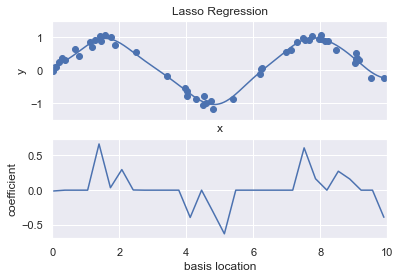

In [21]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')